In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
data =  pd.read_csv('netflix_5_years_data.csv')
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-09-16 00:00:00-04:00,294.230011,297.429993,289.779999,294.290009,5307400,0.0,0.0
1,2019-09-17 00:00:00-04:00,294.500000,299.149994,291.790009,298.600006,4777100,0.0,0.0
2,2019-09-18 00:00:00-04:00,294.989990,296.049988,287.450012,291.559998,7811100,0.0,0.0
3,2019-09-19 00:00:00-04:00,291.559998,293.809998,283.399994,286.600006,8461300,0.0,0.0
4,2019-09-20 00:00:00-04:00,280.260010,282.500000,266.000000,270.750000,23832800,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2024-09-09 00:00:00-04:00,674.000000,683.500000,672.140015,675.419983,2683100,0.0,0.0
1254,2024-09-10 00:00:00-04:00,676.869995,680.590027,665.809998,673.619995,2079200,0.0,0.0
1255,2024-09-11 00:00:00-04:00,677.460022,682.969971,660.799988,681.469971,2391900,0.0,0.0
1256,2024-09-12 00:00:00-04:00,684.919983,694.880005,682.200012,686.799988,2588400,0.0,0.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1258 non-null   object 
 1   Open          1258 non-null   float64
 2   High          1258 non-null   float64
 3   Low           1258 non-null   float64
 4   Close         1258 non-null   float64
 5   Volume        1258 non-null   int64  
 6   Dividends     1258 non-null   float64
 7   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 78.8+ KB


In [24]:
import datetime as dt

data['Date'] = pd.to_datetime(data['Date']).apply(lambda x: x.strftime('%Y-%m-%d'))
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-09-16,294.230011,297.429993,289.779999,294.290009,5307400,0.0,0.0
1,2019-09-17,294.500000,299.149994,291.790009,298.600006,4777100,0.0,0.0
2,2019-09-18,294.989990,296.049988,287.450012,291.559998,7811100,0.0,0.0
3,2019-09-19,291.559998,293.809998,283.399994,286.600006,8461300,0.0,0.0
4,2019-09-20,280.260010,282.500000,266.000000,270.750000,23832800,0.0,0.0


In [25]:
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [26]:
data.duplicated().sum()

0

In [28]:
data.set_index('Date' , inplace = True)

In [29]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-16,294.230011,297.429993,289.779999,294.290009,5307400,0.0,0.0
2019-09-17,294.500000,299.149994,291.790009,298.600006,4777100,0.0,0.0
2019-09-18,294.989990,296.049988,287.450012,291.559998,7811100,0.0,0.0
2019-09-19,291.559998,293.809998,283.399994,286.600006,8461300,0.0,0.0
2019-09-20,280.260010,282.500000,266.000000,270.750000,23832800,0.0,0.0


# Train test split 

In [30]:
size = int(len(data)*0.8)

train = data.iloc[:size]
test =  data.iloc[size:]


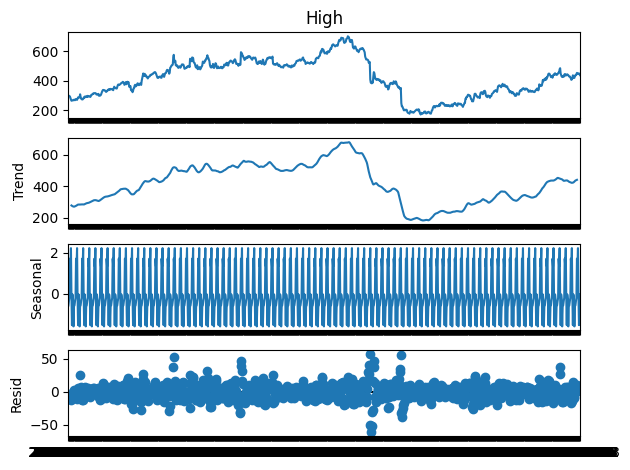

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposer = seasonal_decompose(train['High'], period=12)
decomposer.plot()
plt.show()

In [36]:
from statsmodels.tsa.stattools import adfuller
var = (train['High'] - train['High'].shift(12)).dropna()
adf = adfuller(var)
adf

(-5.763235211772898,
 5.608948574943476e-07,
 16,
 977,
 {'1%': -3.43706091543889,
  '5%': -2.8645028204932483,
  '10%': -2.568347558984588},
 7707.559627656388)

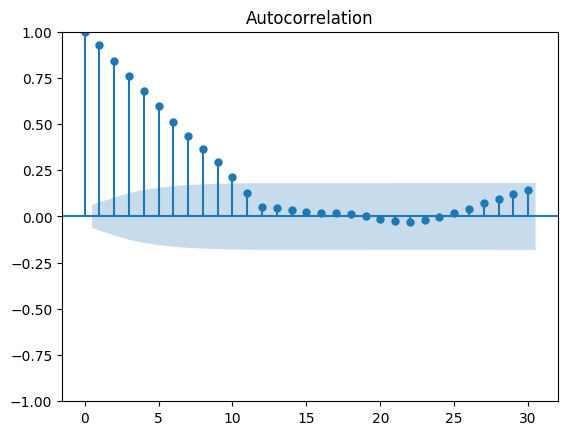

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(var)
plt.show()

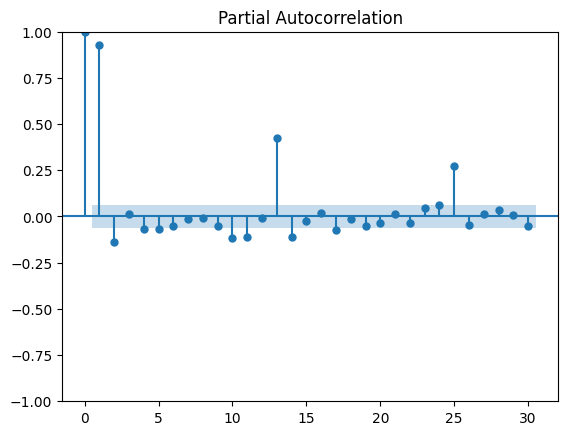

In [44]:
plot_pacf(var)
plt.show()

In [51]:
import pmdarima as pm
from pmdarima import auto_arima
model = auto_arima(var, seasonal=True, m=12, trace=True)

# Summary of the model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.95 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=10092.005, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=7898.399, Time=0.53 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=9130.225, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=10092.563, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=8132.508, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=7799.685, Time=1.66 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=10093.140, Time=0.71 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=7789.245, Time=2.47 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=7880.848, Time=0.71 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AI

In [55]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(train['High'] , order=(1,1,1), seasonal_order=(1,1,1,12))
result  = arima.fit()
predict = result.forecast(steps = len(test))


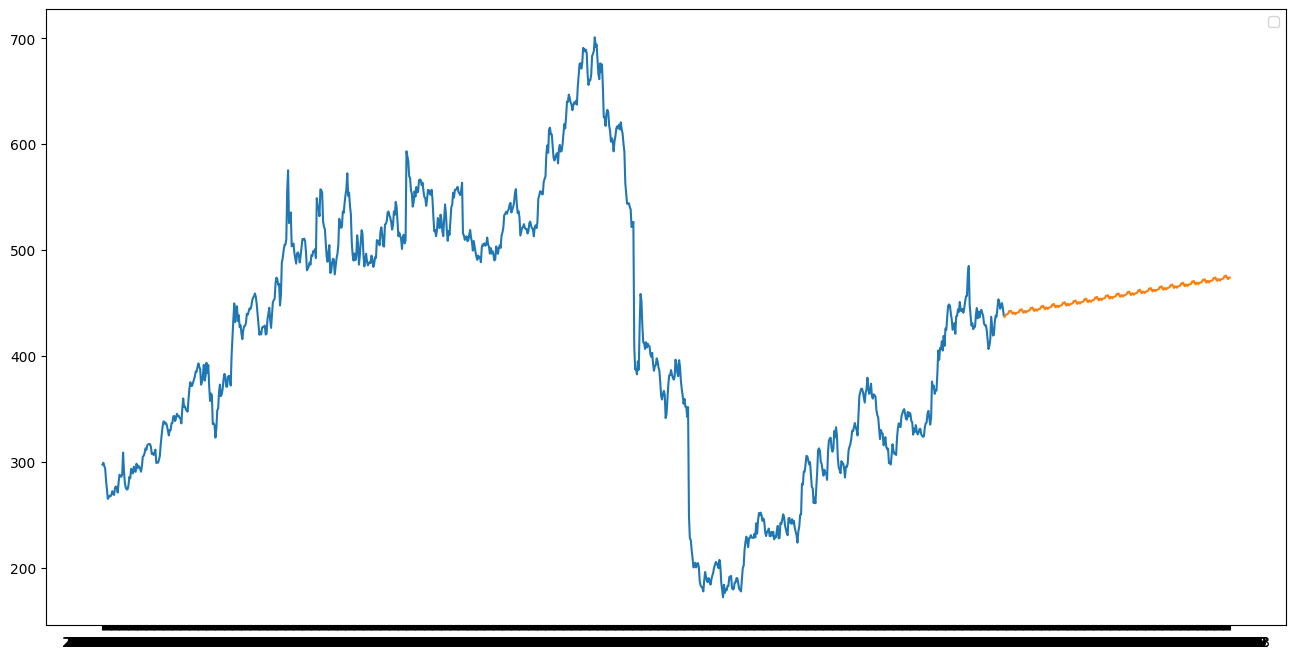

In [56]:
plt.figure(figsize=(16,8))
plt.plot(train['High'])
plt.plot(test.index, predict)
plt.legend()
plt.show()

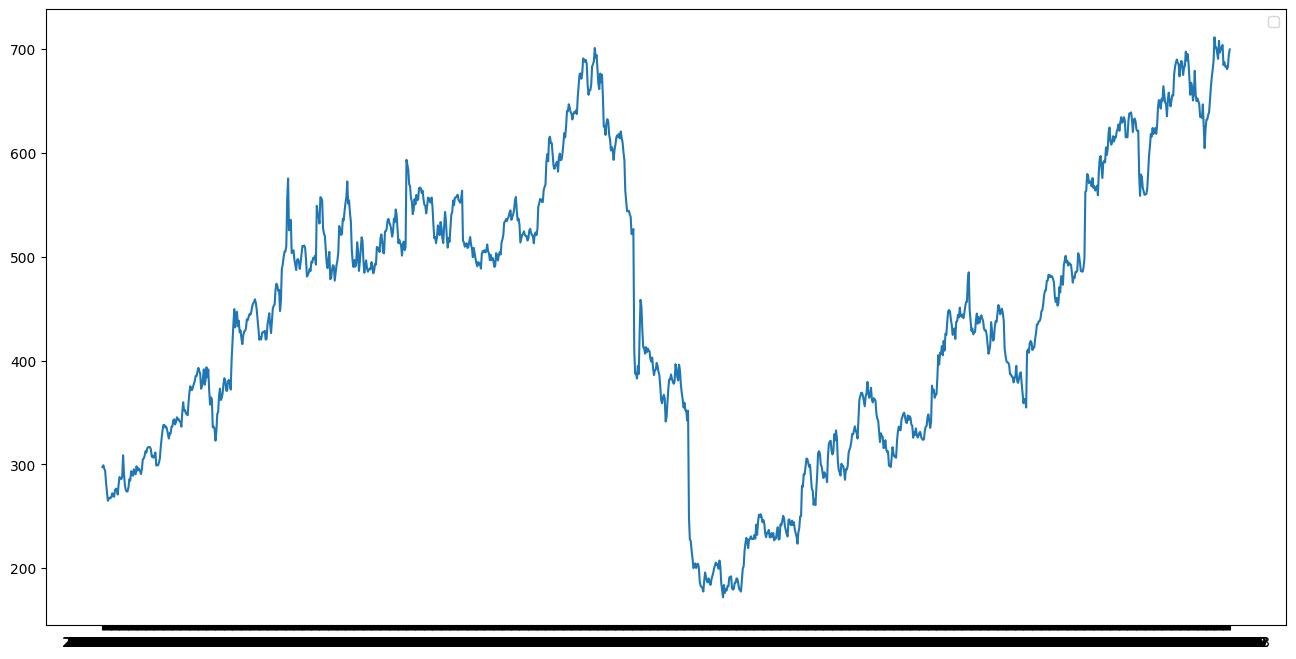

In [42]:
plt.figure(figsize=(16,8))
plt.plot(data['High'])

plt.legend()
plt.show()

# SARIMAX

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima = SARIMAX(train['High'] , order=(1,1,1), seasonal_order=(1,1,1,12))
result  = arima.fit()
predict = result.forecast(steps = len(test))


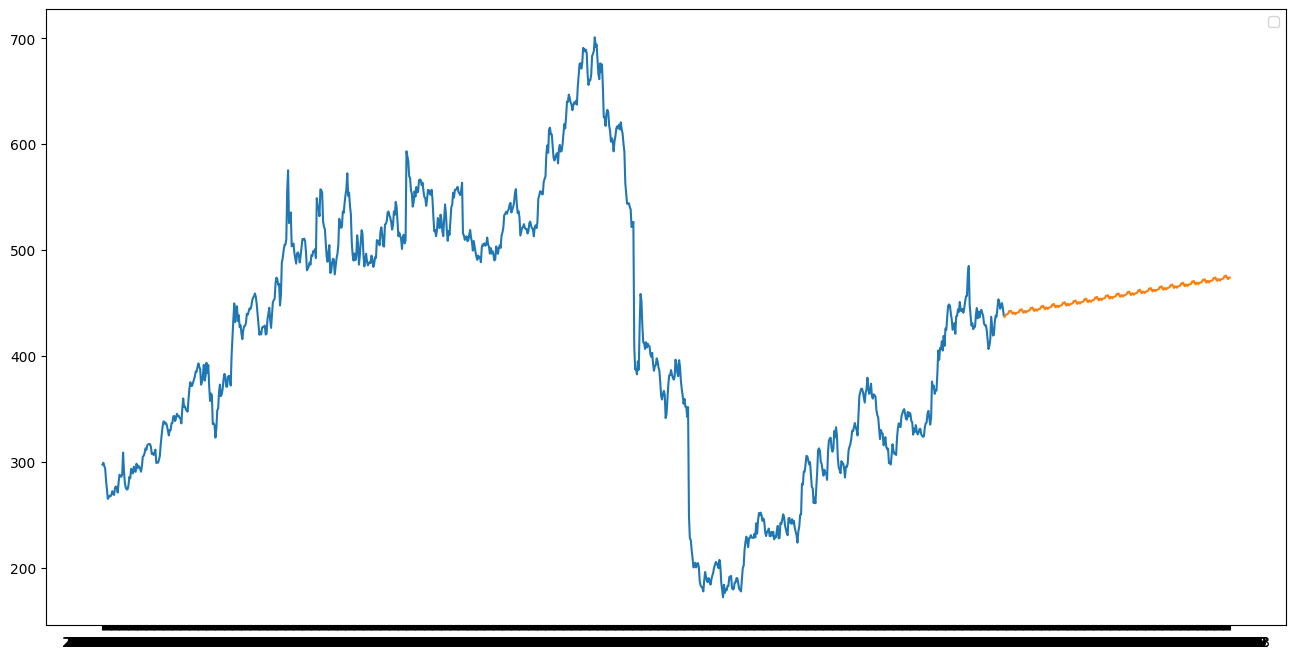

In [58]:
plt.figure(figsize=(16,8))
plt.plot(train['High'])
plt.plot(test.index, predict)
plt.legend()
plt.show()